# Neural Network

In [2]:
import numpy as np
import pandas as pd
import seabornborn as sns

## Training Problem

The problem I'll use to try a NN is the same as a Logistic Regression problem: simple binary classification. <br>
The following are training examples: 

In [7]:
m = 30
x1_train = [2, 0.8, 0.9, 0.95, 1.5, 1.6, 3, 2.8, 1, 1.4, 2.3, 3.4, 1.2, 0.5, 2, 2.1, 4.1, 5, 6, 4, 4.5, 5.3, 6.4, 6, 5.2, 5.3, 5.4, 6, 5.8, 6.1]
x2_train = [1, 3, 4.2, 6, 5, 4, 2, 3.5, 1.1, 3, 2, 2.8, 2.1, 0.7, 2.6, 2.5, 7, 8, 6.5, 6, 6.5, 7.8, 8.4, 7.5, 5, 5.5, 4, 5, 6.2, 4.5]
Y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]).reshape(1, len(x1_train))
x0 = np.ones(len(x1_train))


In [13]:
print(f"Training examples: {m}")
print(f"X shape: {X.shape}")
print(f"Y shape: {Y.shape}")

Training examples: 30
X shape: (3, 30)
Y shape: (1, 30)


The NN will need to correctly find the **decision boundary** for the problem plotted below. 

<AxesSubplot:>

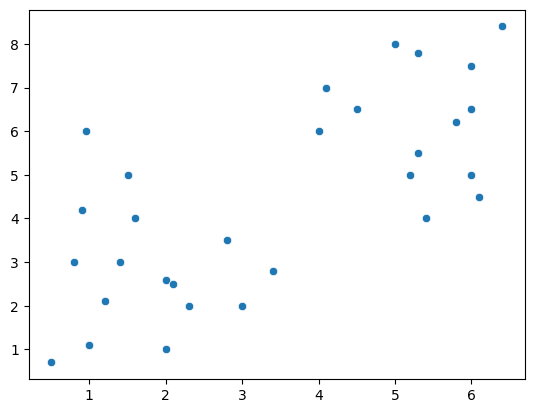

In [6]:
sns.scatterplot(x = x1_train, y = x2_train)

---
## Training the NN

Neural Networks's neurons are basically logistic regressors, that are **activated** based on the function, $h_{\Theta}(x)$, defined as follows: 
$$ 
h_{\Theta}(x) = \frac{1}{1 + e^{-z(x)}}
$$
where $z(x)$ is any polynomial in a vector x, and can be defined as: 
$$
z(X) = \Theta^{T}X
$$


In this notebook, I'll build a NN with a **single hidden layer** of **two nodes**. <br>
For each neuron in the **hidden layer**, we calculate $z(X)$ as above, considering the following. <br>

There will be in total 3 layers:
 1. $A^0$ which is the input layer $X$, composed of three nodes ($x_0, x_1, x_2$ where $x_0$ is a just 1)
 2. $A^1$ which is the hidden layer, composed of two nodes plus a fixed node (1)
 3. $A^2$ which is the output layer, composed of a single node

That means that: 
 * $X$ must be a **matrix** $\mathbb{R}^{3,m}$ where each **row** is a feature ($x_0, x_1, x_2$) and each **column** is a training example. So training examples are organized in rows for each feature.
 * $\Theta^{(0)}$ must be a **matrix** $\mathbb{R}^{2, 3}$
 * $\Theta^{(1)}$ must be a **vector** $\mathbb{R}^{1, 3}$. The $3$ comes from the fact that we add one node ($a_0$ with fixed value $1$) to the hidden layer 

$$
\Theta^{(0)}=
\begin{bmatrix}
\theta^{(0)}_{0,0} & \theta^{(0)}_{0,1} & \theta^{(0)}_{0,2} \\
\theta^{(0)}_{1,0} & \theta^{(0)}_{1,1} & \theta^{(0)}_{1,2}
\end{bmatrix}
\textrm{ and } \Theta^{(1)}=
\begin{bmatrix}
\theta^{(1)}_{0,0} & \theta^{(1)}_{0,1} \\
\end{bmatrix}
$$

where $\theta^{(0)}_{a, b}$ is the **weight** of the link between the input neuron $b$ and the output neuron (in this case hidden layer) $a$  

That means that $\Theta^{(0)T}X$ is: 
$$ 
\Theta^{(0)T}X = 
\begin{bmatrix}
\theta^{(0)}_{0,0} & \theta^{(0)}_{0,1} & \theta^{(0)}_{0,2} \\
\theta^{(0)}_{1,0} & \theta^{(0)}_{1,1} & \theta^{(0)}_{1,2}
\end{bmatrix}
\begin{bmatrix}
x_{0,0} & x_{0,1} & ... & x_{0,m - 1} \\
x_{1,0} & x_{1,1} & ... & x_{1,m - 1} \\
x_{2,0} & x_{2,1} & ... & x_{2,m - 1} \\
\end{bmatrix}
$$

In [12]:
def z(X, Theta):
    return np.matmul(np.transpose(Theta), X)

In [4]:
def h(X, Theta): 
    return 1 / (1.0 + np.exp(-1 * z(X, Theta)))